### O presente trabalho é uma atividade obrigatória do Bootcamp de Engenheiro de Dados do Banco Carrefour.
### Objetivo do notebook é praticar análise de dados com o Pandas, para isso utilizou-se um dataset de vendas de games ao longo dos anos. 
### O dataset pode ser encontrado no seguinte endereço 'https://www.kaggle.com/gregorut/videogamesales?select=vgsales.csv'.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carregando a base de dados


In [11]:
df = pd.read_csv('vgsales.csv')


#### Visualizando a base de dados atráves das funções head() e tail()

In [12]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [14]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


#### Analisando a base de dados

In [15]:
df.shape

(16598, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### Verificando se há dados faltando


In [18]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
# Observa-se que a maior parte dos dados ausentes encontra na coluna Year, neste caso a substiuição dos valores ausentes pela
# média não faz sentido, logo o procedimento tomado é excluir as linhas que contém valores ausentes nas colunas Year e Publisher.

df.dropna(inplace = True)

In [20]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [21]:
# Vamos verificar quais empresas estão no nosso dataset

df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [22]:
# E quais gêneros de jogos estão no nosso dataset?

df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

#### Investigando um pouco mais o nosso dataset


In [39]:
#Jogoso lançados por ano

jogos_ano = df.groupby('Year').count()['Rank']
jogos_ano

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: Publisher, dtype: int64

In [40]:
# E o ano com mais jogos lançados?
jogos_ano.idxmax()

2009.0

In [43]:
# Podemos anlizar também as vendas por região:

vendas_regioes = df.iloc[:,-5:-1] # pegando de trás para frente
vendas_regioes = vendas_regioes.sum(axis=0).reset_index()
vendas_regioes.columns = ['Região', 'Vendas']
vendas_regioes.head()

,Região,Vendas
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


In [45]:
# Qual console se saiu melhor por regiões?

vendas_console = df.groupby('Platform').sum().sort_values(by = 'Global_Sales', ascending=False).iloc[:, 2:]

vendas_console.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91


In [46]:
# Por fim vamos ver qual empresa se saiu melhor ao longo dos anos considerados

vendas_empresa = df['Global_Sales'].groupby(df['Publisher']).sum().sort_values(ascending = False).to_frame().reset_index()

In [47]:
vendas_empresa.head(10)

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


#### Visualizando os dados através de gráficos

Text(0.5, 1.0, 'Número de jogos lançados de 1980 - 2020')

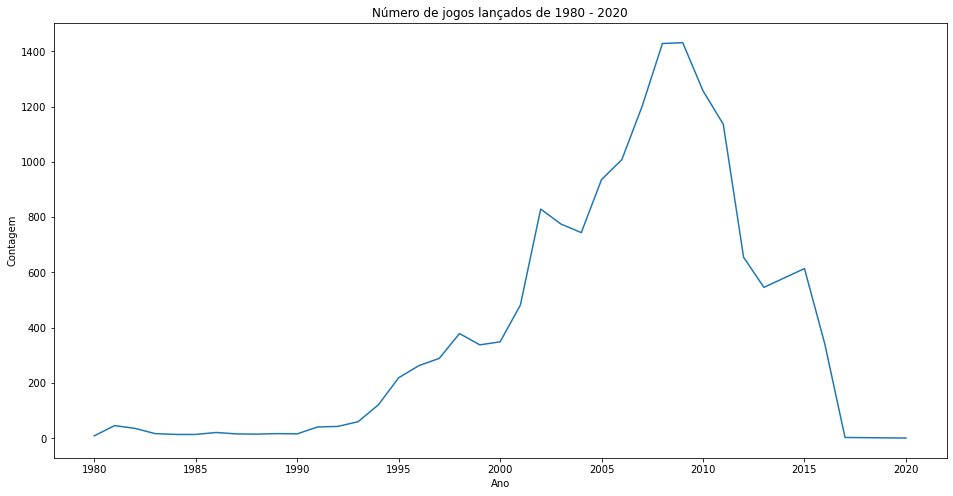

In [49]:
# Primeiro vamos plotar um gráfico do número de lançamentos de jogos ao longo dos anos

plt.figure(figsize= (16,8))

plt.plot(jogos_ano)
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Número de jogos lançados de 1980 - 2020')

In [50]:
# Observa-se o máximo está no ano de 2009, o que foi encontrado anteriormente

Text(0.5, 1.0, 'Vendas por Região')

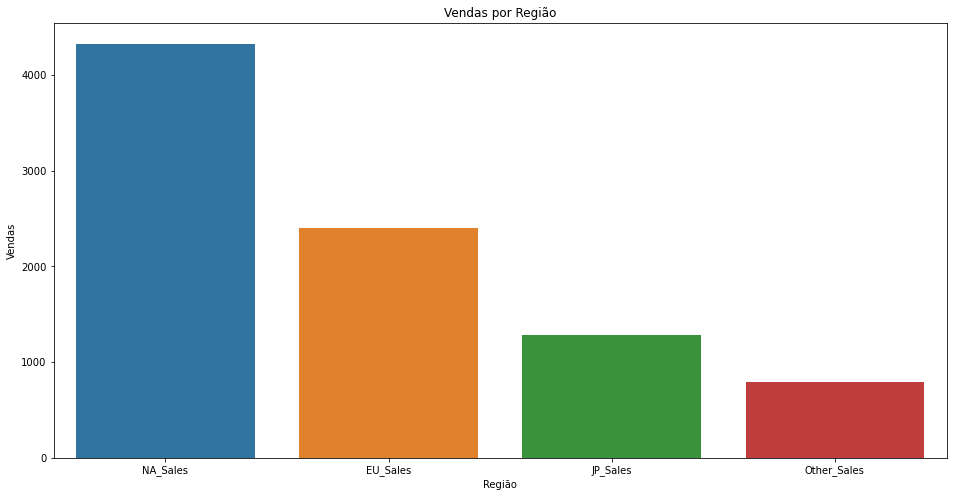

In [55]:
# Podemos plotar também as vendas por regiões, para isso o mais indicado é um gráfico de barras

plt.figure(figsize= (16,8))

sns.barplot(x = 'Região', y = 'Vendas', data =vendas_regioes )

plt.title('Vendas por Região')

Text(0.5, 1.0, 'Top 3 plataformas mais vendidas ao redor do mundo')

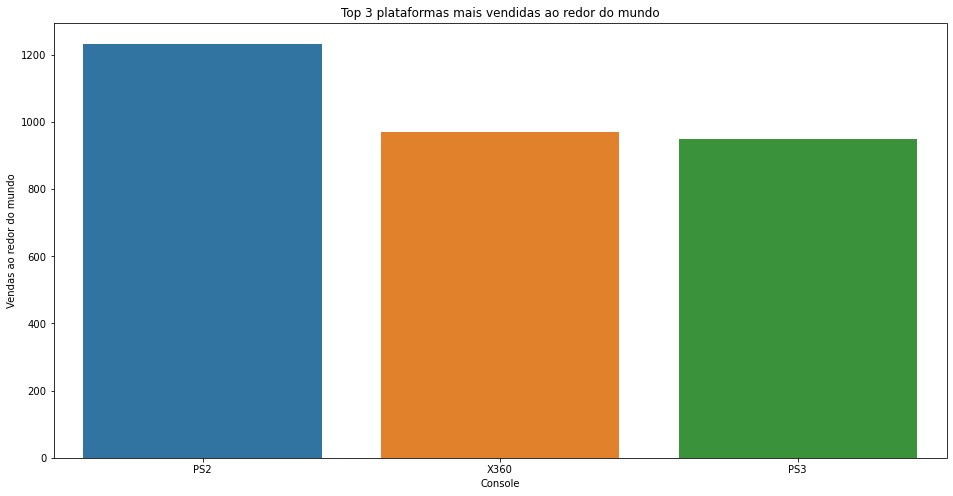

In [61]:
#Top 3 plataformas
plt.figure(figsize= (16,8))
sns.barplot(x =vendas_console.head(3).index, y = vendas_console['Global_Sales'].sort_values(ascending = False).head(3))
plt.xlabel('Console')
plt.ylabel('Vendas ao redor do mundo')
plt.title('Top 3 plataformas mais vendidas ao redor do mundo')